In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.simplefilter('ignore')

from sklearn.metrics import mean_squared_error as mse

In [2]:
data = pd.read_csv('Raw_Housing_Prices.csv')
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [3]:
data.columns

Index(['ID', 'Date House was Sold', 'Sale Price', 'No of Bedrooms',
       'No of Bathrooms', 'Flat Area (in Sqft)', 'Lot Area (in Sqft)',
       'No of Floors', 'Waterfront View', 'No of Times Visited',
       'Condition of the House', 'Overall Grade',
       'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)',
       'Age of House (in Years)', 'Renovated Year', 'Zipcode', 'Latitude',
       'Longitude', 'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        21613 non-null  object 
 10  Condition of the House

In [5]:
data['Sale Price'].head(10)

0     221900.0
1     538000.0
2     180000.0
3     604000.0
4     510000.0
5    1230000.0
6     257500.0
7     291850.0
8     229500.0
9     323000.0
Name: Sale Price, dtype: float64

In [6]:
data['Sale Price'].describe()

count    2.160900e+04
mean     5.401984e+05
std      3.673890e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Sale Price, dtype: float64

# Scater plot for sale price, Finding OUtliers

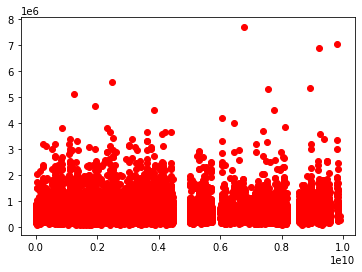

In [7]:
plt.scatter(x = data['ID'], y = data['Sale Price'], color = 'red')

<AxesSubplot:xlabel='Sale Price'>

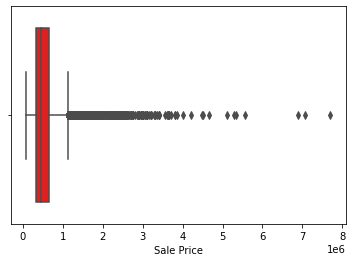

In [8]:
sns.boxplot(x = data['Sale Price'],color = 'red')

# Treating Outliers in Sale Price by Imputing

In [9]:
q1 = data['Sale Price'].quantile(0.25)
q3 = data['Sale Price'].quantile(0.75)

In [10]:
iqr = q3 - q1
iqr

323050.0

In [11]:
upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr
upper_limit, lower_limit

(1129575.0, -162625.0)

In [12]:
def limit_imputer(value):
    if value > upper_limit:
        return upper_limit
    if value < lower_limit:
        return lower_limit
    else:
        return value

In [13]:
data['Sale Price'] = data['Sale Price'].apply(limit_imputer)

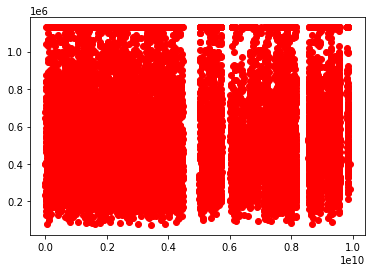

In [14]:
plt.scatter(x = data['ID'], y = data['Sale Price'], color = 'red')

In [15]:
data['Sale Price'].describe()

count    2.160900e+04
mean     5.116186e+05
std      2.500620e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      1.129575e+06
Name: Sale Price, dtype: float64

# FInding and Treating missing values

deletion is preffered for treating missing values in target variable

In [16]:
data.dropna(inplace = True, axis = 0, subset = ['Sale Price'])

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21605 non-null  float64
 5   Flat Area (in Sqft)                        21600 non-null  float64
 6   Lot Area (in Sqft)                         21600 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

checking spread of data over the range

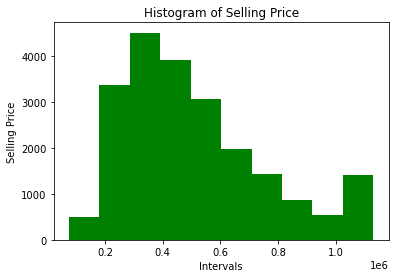

In [18]:
plt.hist(data['Sale Price'], bins = 10, color = 'green')
plt.xlabel('Intervals')
plt.ylabel('Selling Price')
plt.title('Histogram of Selling Price')
plt.show()

# Finding and treating missing values in independent variables

missing values in independent variables are treated by imputation
mean or median for continous variable
mode for object variable

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21605 non-null  float64
 5   Flat Area (in Sqft)                        21600 non-null  float64
 6   Lot Area (in Sqft)                         21600 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [20]:
numerical_columns = ['No of Bathrooms', 'Flat Area (in Sqft)', 'Lot Area (in Sqft)',
                    'Area of the House from Basement (in Sqft)','Latitude','Longitude',
                    'Living Area after Renovation (in Sqft)']

In [21]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')
data[numerical_columns] = imputer.fit_transform(data[numerical_columns])

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [23]:
data['Zipcode'].shape

(21609,)

In [24]:
column = data['Zipcode'].values.reshape(-1,1)
column.shape

(21609, 1)

In [25]:
column = data['Zipcode'].values.reshape(-1,1)
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
data['Zipcode'] = imputer.fit_transform(column)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

# Variable Transformation

In [27]:
data['Zipcode'] = data['Zipcode'].astype(object)
data.dtypes

ID                                             int64
Date House was Sold                           object
Sale Price                                   float64
No of Bedrooms                                 int64
No of Bathrooms                              float64
Flat Area (in Sqft)                          float64
Lot Area (in Sqft)                           float64
No of Floors                                 float64
Waterfront View                               object
No of Times Visited                           object
Condition of the House                        object
Overall Grade                                  int64
Area of the House from Basement (in Sqft)    float64
Basement Area (in Sqft)                        int64
Age of House (in Years)                        int64
Renovated Year                                 int64
Zipcode                                       object
Latitude                                     float64
Longitude                                    f

In [28]:
data['No of Times Visited'].unique()

array(['None', 'Thrice', 'Four', 'Twice', 'Once'], dtype=object)

In [29]:
mapping = {'None':'0',
           'Once':'1',
           'Twice':'2',
           'Thrice':'3',
           'Four': '4'}
data['No of Times Visited'] = data['No of Times Visited'].map(mapping)

In [30]:
data['No of Times Visited'].unique()

array(['0', '3', '4', '2', '1'], dtype=object)

In [31]:
data['Ever Renovated'] = np.where(data['Renovated Year'] == 0,'No','Yes')

In [32]:
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,...,1180.0,0,63,0,98178,47.5112,-122.257,1340.0,5650,No
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,...,2170.0,400,67,1991,98125,47.7210,-122.319,1690.0,7639,Yes
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,0,...,770.0,0,85,0,98028,47.7379,-122.233,2720.0,8062,No
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,...,1050.0,910,53,0,98136,47.5208,-122.393,1360.0,5000,No
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,...,1680.0,0,31,0,98074,47.6168,-122.045,1800.0,7503,No


In [33]:
data['Purchase Year'] = pd.DatetimeIndex(data['Date House was Sold']).year

In [34]:
data['Year Since Renovation'] = np.where(data['Ever Renovated'] == 'Yes',
                                        abs(data['Purchase Year'] - data['Renovated Year']),0)

In [35]:
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Purchase Year,Year Since Renovation
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,...,63,0,98178,47.5112,-122.257,1340.0,5650,No,2017,0
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,...,67,1991,98125,47.7210,-122.319,1690.0,7639,Yes,2017,26
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,0,...,85,0,98028,47.7379,-122.233,2720.0,8062,No,2016,0
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,...,53,0,98136,47.5208,-122.393,1360.0,5000,No,2017,0
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,...,31,0,98074,47.6168,-122.045,1800.0,7503,No,2016,0


In [36]:
data.drop(columns = ['Purchase Year','Date House was Sold', 'Renovated Year'],inplace = True)

In [37]:
data.head()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Year Since Renovation
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,...,1180.0,0,63,98178,47.5112,-122.257,1340.0,5650,No,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,...,2170.0,400,67,98125,47.7210,-122.319,1690.0,7639,Yes,26
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,...,770.0,0,85,98028,47.7379,-122.233,2720.0,8062,No,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,...,1050.0,910,53,98136,47.5208,-122.393,1360.0,5000,No,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,...,1680.0,0,31,98074,47.6168,-122.045,1800.0,7503,No,0


In [38]:
data.drop(columns = ['ID'],inplace = True)

In [39]:
data.head()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Year Since Renovation
0,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,7,1180.0,0,63,98178,47.5112,-122.257,1340.0,5650,No,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,7,2170.0,400,67,98125,47.7210,-122.319,1690.0,7639,Yes,26
2,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,6,770.0,0,85,98028,47.7379,-122.233,2720.0,8062,No,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,7,1050.0,910,53,98136,47.5208,-122.393,1360.0,5000,No,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,8,1680.0,0,31,98074,47.6168,-122.045,1800.0,7503,No,0


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Sale Price                                 21609 non-null  float64
 1   No of Bedrooms                             21609 non-null  int64  
 2   No of Bathrooms                            21609 non-null  float64
 3   Flat Area (in Sqft)                        21609 non-null  float64
 4   Lot Area (in Sqft)                         21609 non-null  float64
 5   No of Floors                               21609 non-null  float64
 6   Waterfront View                            21609 non-null  object 
 7   No of Times Visited                        21609 non-null  object 
 8   Condition of the House                     21609 non-null  object 
 9   Overall Grade                              21609 non-null  int64  
 10  Area of the House from

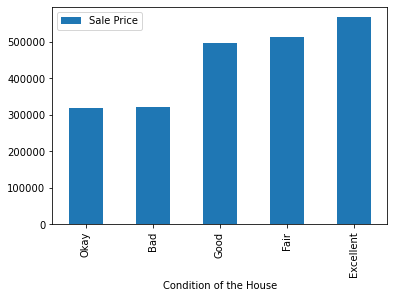

In [41]:
data.groupby('Condition of the House'
            )['Sale Price'].mean().sort_values().plot(kind = 'bar')
plt.legend()

<AxesSubplot:xlabel='Zipcode'>

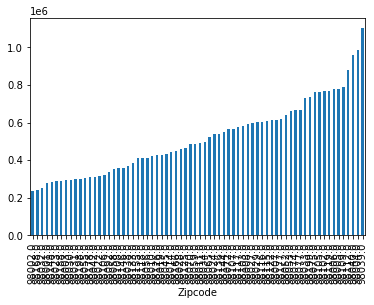

In [42]:
data.groupby('Zipcode'
            )['Sale Price'].mean().sort_values().plot(kind = 'bar')

binning and creation of dummy variable

In [43]:
data = pd.get_dummies(data, columns = ['Ever Renovated','Waterfront View'], drop_first = True)

In [44]:
data = pd.get_dummies(data, columns = ['Condition of the House'], drop_first = True)

In [45]:
data.head()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Year Since Renovation,Ever Renovated_Yes,Waterfront View_Yes,Condition of the House_Excellent,Condition of the House_Fair,Condition of the House_Good,Condition of the House_Okay
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,-122.257,1340.0,5650,0,0,0,0,1,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,-122.319,1690.0,7639,26,1,0,0,1,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,-122.233,2720.0,8062,0,0,0,0,1,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,-122.393,1360.0,5000,0,0,0,1,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,-122.045,1800.0,7503,0,0,0,0,1,0,0


In [46]:
Zip_table = data.groupby('Zipcode').agg({'Sale Price':'mean'}).sort_values('Sale Price', ascending = True)


In [47]:
Zip_table.head()

,Sale Price
Zipcode,
98002.0,234284.035176
98168.0,240328.371747
98032.0,251296.240000
98001.0,280804.690608
98148.0,284908.596491


In [48]:
Zip_table['Zipcode_Group'] = pd.cut(Zip_table['Sale Price'],bins = 10,
                                   labels = ['Zipcode_0',
                                            'Zipcode_1',
                                            'Zipcode_2',
                                            'Zipcode_3',
                                            'Zipcode_4',
                                            'Zipcode_5',
                                            'Zipcode_6',
                                            'Zipcode_7',
                                            'Zipcode_8',
                                            'Zipcode_9'],
                                   include_lowest = True)

In [49]:
Zip_table = Zip_table.drop(columns = 'Sale Price')

In [50]:
data = pd.merge(data,Zip_table,
               left_on = 'Zipcode',
               how= 'left',
               right_index = True)

In [51]:
data = data.drop(columns = 'Zipcode')

In [52]:
data.head()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Year Since Renovation,Ever Renovated_Yes,Waterfront View_Yes,Condition of the House_Excellent,Condition of the House_Fair,Condition of the House_Good,Condition of the House_Okay,Zipcode_Group
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,1340.0,5650,0,0,0,0,1,0,0,Zipcode_0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,1690.0,7639,26,1,0,0,1,0,0,Zipcode_2
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,2720.0,8062,0,0,0,0,1,0,0,Zipcode_2
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,1360.0,5000,0,0,0,1,0,0,0,Zipcode_3
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,1800.0,7503,0,0,0,0,1,0,0,Zipcode_4


In [53]:
data = pd.get_dummies(data, columns = ['Zipcode_Group'], drop_first = True)

In [54]:
data.head()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Condition of the House_Okay,Zipcode_Group_Zipcode_1,Zipcode_Group_Zipcode_2,Zipcode_Group_Zipcode_3,Zipcode_Group_Zipcode_4,Zipcode_Group_Zipcode_5,Zipcode_Group_Zipcode_6,Zipcode_Group_Zipcode_7,Zipcode_Group_Zipcode_8,Zipcode_Group_Zipcode_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0


In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Y = data['Sale Price']
X = scaler.fit_transform(data.drop(columns = ['Sale Price']))
X = pd.DataFrame(data = X, columns = data.drop(columns = ['Sale Price']).columns)

# Corelation between Variables

In [56]:
corr_matrix = X.corr()
corr_matrix

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Condition of the House_Okay,Zipcode_Group_Zipcode_1,Zipcode_Group_Zipcode_2,Zipcode_Group_Zipcode_3,Zipcode_Group_Zipcode_4,Zipcode_Group_Zipcode_5,Zipcode_Group_Zipcode_6,Zipcode_Group_Zipcode_7,Zipcode_Group_Zipcode_8,Zipcode_Group_Zipcode_9
No of Bedrooms,1.000000,0.515813,0.576628,0.031692,0.175536,0.079575,0.349223,0.477549,0.303294,-0.154113,...,-0.051957,-0.010603,-0.039342,-0.074129,0.024433,0.019420,0.090177,0.016725,0.102736,0.035694
No of Bathrooms,0.515813,1.000000,0.754568,0.087732,0.500776,0.187791,0.635638,0.685088,0.283798,-0.505954,...,-0.077419,-0.032810,-0.081460,-0.034459,0.084054,0.052804,0.123256,0.037746,0.110012,0.067871
Flat Area (in Sqft),0.576628,0.754568,1.000000,0.172721,0.354142,0.284678,0.705725,0.876226,0.435142,-0.318146,...,-0.065334,-0.058817,-0.063005,-0.078761,0.086139,0.075978,0.160045,0.051211,0.169576,0.090253
Lot Area (in Sqft),0.031692,0.087732,0.172721,1.000000,-0.005162,0.074668,0.102314,0.183492,0.015252,-0.053119,...,0.037619,0.023684,0.052103,-0.041112,-0.012050,0.015320,-0.023270,-0.027419,-0.007025,0.002671
No of Floors,0.175536,0.500776,0.354142,-0.005162,1.000000,0.029504,0.461368,0.524031,-0.245572,-0.489244,...,-0.055951,-0.003385,-0.067904,0.079211,0.071786,0.009203,0.069857,0.064981,-0.008633,0.005868
No of Times Visited,0.079575,0.187791,0.284678,0.074668,0.029504,1.000000,0.223661,0.167812,0.276974,0.053395,...,-0.018557,-0.065000,0.004754,0.005905,0.003509,0.024801,0.068144,-0.012548,0.065335,0.012923
Overall Grade,0.349223,0.635638,0.705725,0.102314,0.461368,0.223661,1.000000,0.705153,0.145232,-0.456711,...,-0.090561,-0.075495,-0.121379,-0.047869,0.151245,0.095613,0.200548,0.077126,0.156952,0.048638
Area of the House from Basement (in Sqft),0.477549,0.685088,0.876226,0.183492,0.524031,0.167812,0.705153,1.000000,-0.051825,-0.423848,...,-0.058931,-0.028348,-0.052418,-0.090628,0.086640,0.062267,0.129310,0.029477,0.134021,0.087398
Basement Area (in Sqft),0.303294,0.283798,0.435142,0.015252,-0.245572,0.276974,0.145232,-0.051825,1.000000,0.133072,...,-0.025312,-0.069149,-0.032302,0.006247,0.016422,0.040662,0.090206,0.051128,0.101159,0.023775
Age of House (in Years),-0.154113,-0.505954,-0.318146,-0.053119,-0.489244,0.053395,-0.456711,-0.423848,0.133072,1.000000,...,0.067269,-0.070111,0.022094,0.095882,-0.056974,-0.009965,0.025718,0.101486,-0.002705,-0.002492


In [57]:
k = X.corr()
z = [[str(i),str(j)] for i in k.columns for j in k.columns if (k.loc[i,j] > abs(0.5)) & (i!=j)]
z,len(z)

([['No of Bedrooms', 'No of Bathrooms'],
  ['No of Bedrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Bedrooms'],
  ['No of Bathrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Floors'],
  ['No of Bathrooms', 'Overall Grade'],
  ['No of Bathrooms', 'Area of the House from Basement (in Sqft)'],
  ['No of Bathrooms', 'Living Area after Renovation (in Sqft)'],
  ['Flat Area (in Sqft)', 'No of Bedrooms'],
  ['Flat Area (in Sqft)', 'No of Bathrooms'],
  ['Flat Area (in Sqft)', 'Overall Grade'],
  ['Flat Area (in Sqft)', 'Area of the House from Basement (in Sqft)'],
  ['Flat Area (in Sqft)', 'Living Area after Renovation (in Sqft)'],
  ['Lot Area (in Sqft)', 'Lot Area after Renovation (in Sqft)'],
  ['No of Floors', 'No of Bathrooms'],
  ['No of Floors', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 'No of Bathrooms'],
  ['Overall Grade', 'Flat Area (in Sqft)'],
  ['Overall Grade', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 

In [58]:
#importing variance inflation factor function from the statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = X

## calculating VIF for every column
VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])],index = vif_data.columns)


In [59]:
VIF[VIF == VIF.max()].index[0]

'Flat Area (in Sqft)'

In [60]:
def MC_remover(data):
    vif = pd.Series([variance_inflation_factor(data.values,i) for i in range(data.shape[1])],index = data.columns)
    if vif.max()> 5:
        print(vif[vif == vif.max()].index[0],'has been removed')
        data = data.drop(columns = [vif[vif == vif.max()].index[0]])
        return data
    else:
        print('No multicollinearity present anymore')
        return data

In [61]:
for i in range(7):
    vif_data = MC_remover(vif_data)

vif_data.head()

Flat Area (in Sqft) has been removed
Condition of the House_Fair has been removed
No multicollinearity present anymore
No multicollinearity present anymore
No multicollinearity present anymore
No multicollinearity present anymore
No multicollinearity present anymore


,No of Bedrooms,No of Bathrooms,Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,...,Condition of the House_Okay,Zipcode_Group_Zipcode_1,Zipcode_Group_Zipcode_2,Zipcode_Group_Zipcode_3,Zipcode_Group_Zipcode_4,Zipcode_Group_Zipcode_5,Zipcode_Group_Zipcode_6,Zipcode_Group_Zipcode_7,Zipcode_Group_Zipcode_8,Zipcode_Group_Zipcode_9
0,-0.398724,-1.447526,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,-0.352576,...,-0.089574,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,1.161645,...,-0.089574,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,1.283619,...,-0.089574,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,-0.283288,...,-0.089574,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,0.409587,...,-0.089574,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


In [62]:
VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])],index = vif_data.columns)
VIF,len(vif_data.columns)

(No of Bedrooms                               1.638990
 No of Bathrooms                              3.373805
 Lot Area (in Sqft)                           2.107495
 No of Floors                                 2.127703
 No of Times Visited                          1.432363
 Overall Grade                                2.956967
 Area of the House from Basement (in Sqft)    4.580042
 Basement Area (in Sqft)                      1.974981
 Age of House (in Years)                      2.626504
 Latitude                                     2.471343
 Longitude                                    1.672667
 Living Area after Renovation (in Sqft)       3.063886
 Lot Area after Renovation (in Sqft)          2.144068
 Year Since Renovation                        2.788064
 Ever Renovated_Yes                           2.955539
 Waterfront View_Yes                          1.208288
 Condition of the House_Excellent             1.206487
 Condition of the House_Good                  1.251488
 Condition

# Train/Test Set

In [63]:
X = vif_data
y = data['Sale Price']

In [64]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(X,Y, test_size = 0.3,random_state = 101)
x_train.shape, x_test.shape , y_train.shape, y_test.shape

((15126, 28), (6483, 28), (15126,), (6483,))

# Linear Regression

In [65]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize = True)
lr.fit(x_train, y_train)

LinearRegression(normalize=True)

In [66]:
lr.coef_

array([ -3928.66247639,  12028.44560689,  14967.00497585,   2697.55278605,
        27220.31313417,  59965.44665815,  80697.80906997,  27729.56715434,
        27873.90231343,  21397.40341959, -23854.32640243,  17943.26729788,
        -2896.98542901, -10179.085198  ,  14594.33847962,  10761.77007875,
        14239.3533334 ,   5095.97603572,  -2296.64888137,  12165.83372082,
        33842.29544383,  63269.82875283,  81086.08553213,  50718.63947886,
        73274.09568028,  40153.03595158,  67405.70271285,  22113.74944051])

In [67]:
Y_predicted = lr.predict(x_test)
lr.score(x_test,y_test)

0.8461987715586199

In [68]:
from sklearn.metrics import r2_score
R = r2_score(y_test,Y_predicted)
n = len(y)
m = len(X.columns)
adj_R = 1 - ((1-R)*(n-1))/(n-m-1)
adj_R

0.8459992148210685

In [69]:
from sklearn.metrics import mean_squared_error

rmse_linear = np.sqrt(mean_squared_error(y_test, Y_predicted))
rmse_linear

98639.49314807726

# Polynomial Regression

In [70]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
poly_x = poly.fit_transform(X)

In [71]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(poly_x,Y, test_size = 0.3,random_state = 101)
x_train.shape, x_test.shape , y_train.shape, y_test.shape

((15126, 435), (6483, 435), (15126,), (6483,))

In [72]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize = True)
lr.fit(x_train, y_train)
y_predicted2 = lr.predict(x_test)

In [73]:
from sklearn.metrics import mean_squared_error

rmse_poly = np.sqrt(mean_squared_error(y_test, y_predicted2))
rmse_poly

3.1312585518948364e+16

# Ridge Regression

In [74]:
from sklearn.linear_model import RidgeCV

alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]

ridgeCV = RidgeCV( alphas=alphas, cv=4)

ridgeCV.fit(x_train,y_train)


RidgeCV(alphas=array([5.0e-03, 5.0e-02, 1.0e-01, 3.0e-01, 1.0e+00, 3.0e+00, 5.0e+00,
       1.0e+01, 1.5e+01, 3.0e+01, 8.0e+01]),
        cv=4)

In [75]:
Y_predicted3 = ridgeCV.predict(x_test)

rmse_ridgeCV = np.sqrt(mean_squared_error(y_test, Y_predicted3))
rmse_ridgeCV

88196.30709770852

# Lasso Regression

In [76]:
from sklearn.linear_model import LassoCV

alphas2 = np.array([1e-5, 5e-5, 0.0001, 0.0005])

lassoCV = LassoCV(alphas=alphas2,max_iter=5e4,cv=3)

lassoCV.fit(x_train,y_train)

Y_predicted4 = lassoCV.predict(x_test)



In [77]:
rmse_lassoCV = np.sqrt(mean_squared_error(y_test, Y_predicted4))
rmse_lassoCV

535861.4371132243

In [78]:
print('Of {} coefficients, {} are non-zero with Lasso.'.format(len(lassoCV.coef_), 
                                                               len(lassoCV.coef_.nonzero()[0])))

Of 435 coefficients, 434 are non-zero with Lasso.


# ElasticNetCV

In [79]:
from sklearn.linear_model import ElasticNetCV

l1_ratios = np.linspace(0.1, 0.9, 9)

elasticNetCV = ElasticNetCV(alphas=alphas2,l1_ratio=l1_ratios,max_iter=1e4)

elasticNetCV.fit(x_train,y_train)

y_predicted5 = elasticNetCV.predict(x_test)


In [80]:
rmse_elasticNetCV = np.sqrt(mean_squared_error(y_test, y_predicted5))
rmse_elasticNetCV

88282.14806969585

In [81]:
rmse_vals = [rmse_linear, rmse_ridgeCV, rmse_lassoCV, rmse_elasticNetCV ]

labels = ['Linear', 'Ridge', 'Lasso', 'ElasticNet']

rmse_df = pd.Series(rmse_vals, index=labels).to_frame()
rmse_df.rename(columns={0: 'RMSE'}, inplace=1)
rmse_df

,RMSE
Linear,98639.493148
Ridge,88196.307098
Lasso,535861.437113
ElasticNet,88282.148070


After comparing the root_mean_squared_error of all this regression model we can clearly infer that the losso regression fits the dataset best.